<a href="https://colab.research.google.com/github/dspark0419/DATA-201/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 2**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
plt.style.use('ggplot')
sns.set_context('notebook')
sns.set_style('ticks')

## **Dataset**
The dataset '**train.csv**' is obtained from the source below.

**Source:** https://www.kaggle.com/vigneshvenkat/airplane

## **Column Infomation**

AccidentID: unique id assigned to each row  
AccidentTypeCode: the type of accident (factor, not numeric)  
CabinTemperature: the last recorded temperature before the incident, measured in degrees fahrenheit  
TurbulenceIngforces: the recorded/estimated turbulence experienced during the accident  
ControlMetric: an estimation of how much control the pilot had during the incident given the factors at play  
TotalSafetyComplaints: number of complaints from mechanics prior to the accident  
DaysSinceInspection: how long the plane went without inspection before the incident  
SafetyScore: a measure of how safe the plane was deemed to be  
Severity: a description (4 level factor) on the severity of the crash

Turbulence :
Turbulence is an irregular motion of the air resulting from eddies and vertical currents. It may be as insignificant as a few annoying bumps or severe enough to momentarily throw an airplane out of control or to cause structural damage. Turbulence is associated with fronts, wind shear, thunderstorms, etc.

## **Goal**  
The task is to accurately predict the severity of an airplane accident given features. The severity is divided into 4 different classes.

## **Data Wrangling**

Importing the dataset and obtaining basic information

In [3]:
airplane_accident = pd.read_csv('train.csv')

In [4]:
airplane_accident.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [5]:
airplane_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


Checking misssing values and then dropping them

In [6]:
airplane_accident.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

Obtaining the labels of the unique object 'Severity'

In [7]:
airplane_accident['Severity'].unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

Encoding manually the object Severity according to its severity

In [8]:
label_severity = {'Minor_Damage_And_Injuries': 0, 'Significant_Damage_And_Serious_Injuries': 1, 
                  'Highly_Fatal_And_Damaging': 2, 'Significant_Damage_And_Fatalities': 3}
airplane_accident['Severity'] = airplane_accident['Severity'].replace(label_severity)
airplane_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  int64  
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


## **Data Visualization**

Dropping the variable 'Accident_ID'

In [9]:
accident = airplane_accident.drop(columns=['Accident_ID'])

Barplot of the target variable 'Severity'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


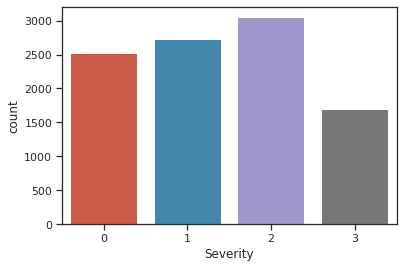

In [10]:
sns.countplot(accident['Severity'])

Displaying the barplots of the feature variables over the targent variable 'Severity'

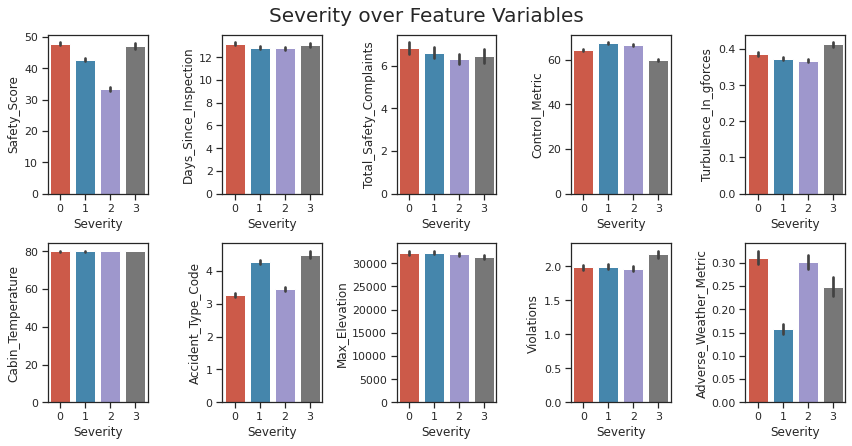

In [11]:
fig, axes = plt.subplots(2, 5, figsize=[12,6])

for i in range(5):
  sns.barplot(x=accident['Severity'], y=accident.iloc[:, i+1], ax=axes[0, i])
  sns.barplot(x=accident['Severity'], y=accident.iloc[:, i+1+5], ax=axes[1, i])

fig.suptitle('Severity over Feature Variables', y=1.03, size=20)
fig.tight_layout()
plt.show()

It seems that there is no relationships between the target variable and other variables.

Let's check this with correlations.

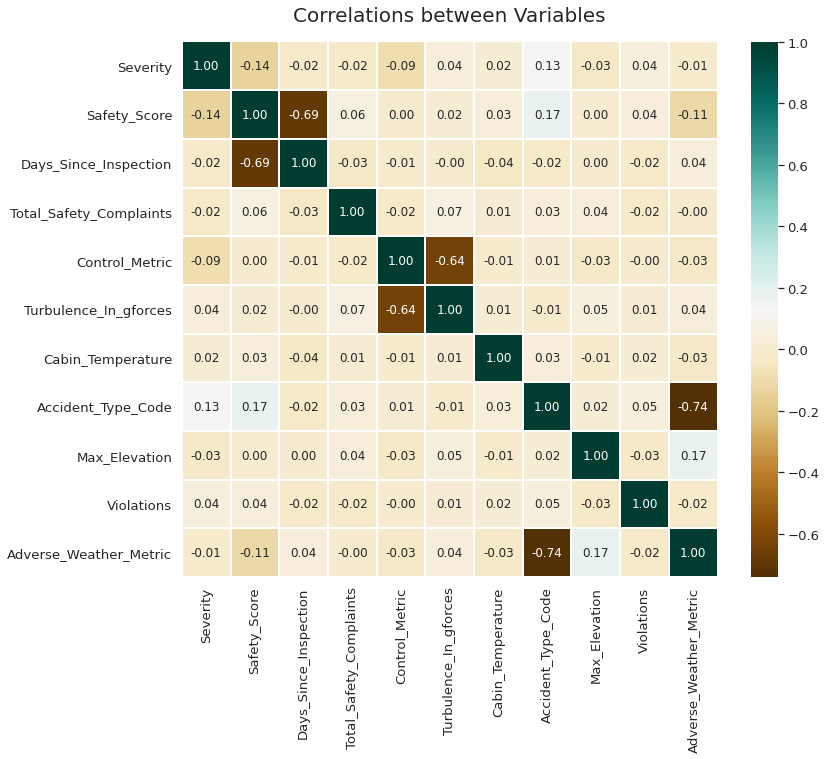

In [12]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=[12,12])
sns.heatmap(ax=ax, data=accident.corr(), annot=True, square=True,  fmt='.2f', 
            annot_kws={'size':12}, cbar_kws={"shrink": .82}, cmap='BrBG', linewidths=1)
ax.set_title('Correlations between Variables', size=20, pad=20)
plt.show()

## **Multi-Class Classification**

In [13]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

Splitting the dataset into a feature dataset and a target dataset

In [14]:
X = accident.drop(columns=['Severity'])
y = accident['Severity']

In [15]:
X.head(), y[:10]

(   Safety_Score  Days_Since_Inspection  ...  Violations  Adverse_Weather_Metric
 0     49.223744                     14  ...           3                0.424352
 1     62.465753                     10  ...           2                0.352350
 2     63.059361                     13  ...           3                0.003364
 3     48.082192                     11  ...           1                0.211728
 4     26.484018                     13  ...           2                0.176883
 
 [5 rows x 10 columns], 0    0
 1    0
 2    3
 3    1
 4    3
 5    0
 6    2
 7    0
 8    2
 9    1
 Name: Severity, dtype: int64)

Converting a class vector with integers to a binary class matrix

In [16]:
from keras.utils import to_categorical
y = to_categorical(y)

Splitting the feature and target datasets into train/test sets

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7500, 10), (7500, 4), (2500, 10), (2500, 4))

In [18]:
X_test.head(), y_test[:10]

(      Safety_Score  Days_Since_Inspection  ...  Violations  Adverse_Weather_Metric
 1048     54.748858                     15  ...           4                0.005603
 1569     41.004566                      9  ...           1                0.065164
 1254     38.767123                     10  ...           3                0.002434
 6136     76.392694                      9  ...           3                0.002612
 3034     65.433790                     12  ...           2                0.019927
 
 [5 rows x 10 columns], array([[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.]], dtype=float32))

Defining a keras model with an input layer of 10 inputs, two hidden layers, and a 4-neuron output layer

In [19]:
model = Sequential()
model.add(Dense(32, input_shape=(10,), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 68        
Total params: 1,140
Trainable params: 1,044
Non-trainable params: 96
_________________________________________________________________


Compiling the model with 'adam' activation and 'categorical_crossentropy' loss function

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training the model

In [21]:
model.fit(X_train, y_train, epochs=5, batch_size=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 1.3690 - accuracy: 0.3300
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.3555 - accuracy: 0.3265
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 1.3670 - accuracy: 0.3197
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 1.3318 - accuracy: 0.3751
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.2889 - accuracy: 0.4031


Obtaining the loss and accuracy for the test sets

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 2ms/step - loss: 11.5691 - accuracy: 0.2540


In [23]:
print('Loss: {:5.4f} | Accuracy: {:5.2f}%'.format(loss, accuracy*100))

Loss: 11.5691 | Accuracy: 25.40%


Evaluating the model for the test set

In [24]:
predictions = model.predict(X_test)
predictions[:5]

array([[9.8299992e-01, 3.1373227e-05, 1.9308338e-08, 1.6968587e-02],
       [9.9620795e-01, 5.9810191e-07, 3.4258438e-12, 3.7914787e-03],
       [9.8733598e-01, 1.3774103e-05, 2.6985254e-09, 1.2650247e-02],
       [9.9384212e-01, 1.6639515e-06, 3.8494052e-11, 6.1562462e-03],
       [9.9348217e-01, 1.9196657e-06, 5.2943823e-11, 6.5158992e-03]],
      dtype=float32)

Converting the predinctions into multiple classes

In [25]:
y_predicted = [x[:11].round() for x in predictions]
y_predicted[:5]

[array([1., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32)]

In [26]:
print('{:10} | {}'.format('predicted', 'expected'))
for i in range(10):
  print('{} | {}'.format(y_predicted[i], y_test[i]))

predicted  | expected
[1. 0. 0. 0.] | [0. 0. 0. 1.]
[1. 0. 0. 0.] | [0. 0. 0. 1.]
[1. 0. 0. 0.] | [0. 0. 0. 1.]
[1. 0. 0. 0.] | [0. 0. 0. 1.]
[1. 0. 0. 0.] | [0. 0. 0. 1.]
[1. 0. 0. 0.] | [1. 0. 0. 0.]
[1. 0. 0. 0.] | [0. 0. 1. 0.]
[1. 0. 0. 0.] | [0. 1. 0. 0.]
[1. 0. 0. 0.] | [1. 0. 0. 0.]
[1. 0. 0. 0.] | [0. 0. 1. 0.]


## **Decistion Tree**

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [28]:
# Creating a decision tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", random_state=66)  # default criterion is 'gini'

# Training the classifier
clf.fit(X_train, y_train)

# Predicting the response for test dataset
y_pred = clf.predict(X_test)

In [29]:
print('{:10} | {}'.format('predicted', 'expected'))
for i in range(10):
  print('{} | {}'.format(y_pred[i], y_test[i]))

predicted  | expected
[0. 0. 0. 1.] | [0. 0. 0. 1.]
[0. 0. 0. 1.] | [0. 0. 0. 1.]
[0. 0. 0. 1.] | [0. 0. 0. 1.]
[0. 0. 0. 1.] | [0. 0. 0. 1.]
[1. 0. 0. 0.] | [0. 0. 0. 1.]
[1. 0. 0. 0.] | [1. 0. 0. 0.]
[0. 0. 1. 0.] | [0. 0. 1. 0.]
[0. 1. 0. 0.] | [0. 1. 0. 0.]
[1. 0. 0. 0.] | [1. 0. 0. 0.]
[0. 0. 1. 0.] | [0. 0. 1. 0.]


In [30]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.93


Plotting a decision tree

In [31]:
plt.style.use('default')
from sklearn import tree

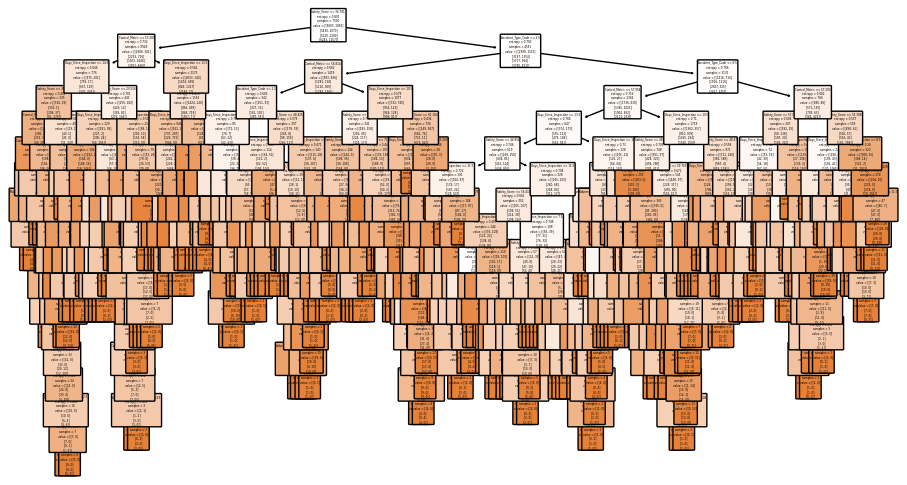

In [32]:
fig, ax = plt.subplots(figsize=(11, 6))
tree.plot_tree(clf, filled=True, rounded=True, feature_names = X.columns, class_names=[0, 1, 2, 3], fontsize=2)
plt.show()

Optimizing the tree

In [33]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=66)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=66, splitter='best')

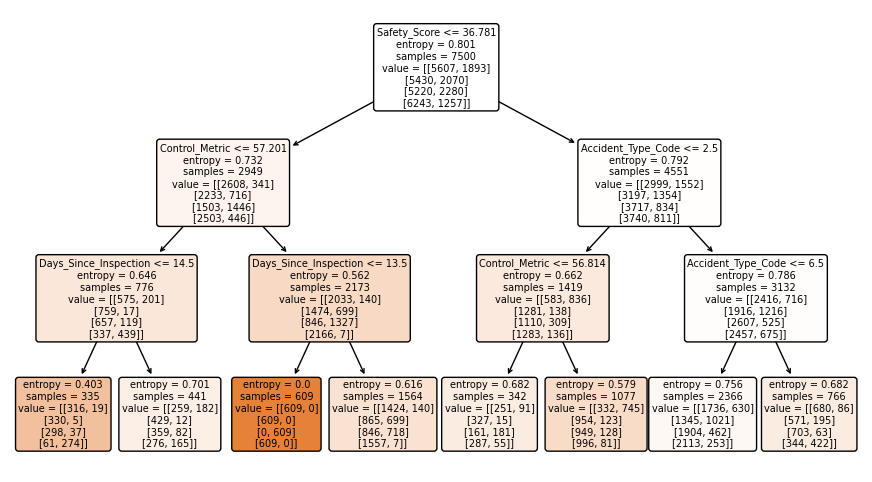

In [34]:
fig, ax = plt.subplots(figsize=(11, 6))
tree.plot_tree(clf, filled=True, rounded=True, feature_names = X.columns, class_names=[0, 1, 2, 3], fontsize=7)
plt.show()